In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/car data.csv


In [2]:
car = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Dataset shape - rows, columns
car.shape

(301, 9)

In [4]:
# statistical summary of features

car.describe(include= 'all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# From age column we can get how old cat it is

car['age_car'] = 2020 - car['Year']

In [8]:
# Now drop year column as we have acquired the needed information from the year column

car.drop('Year', axis = 1, inplace = True)

car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Visualization of Data

In [9]:
# import libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

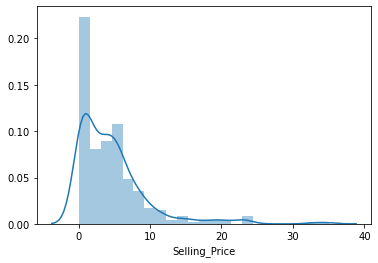

In [10]:
# Target columns

sns.distplot(car['Selling_Price'])
plt.show()

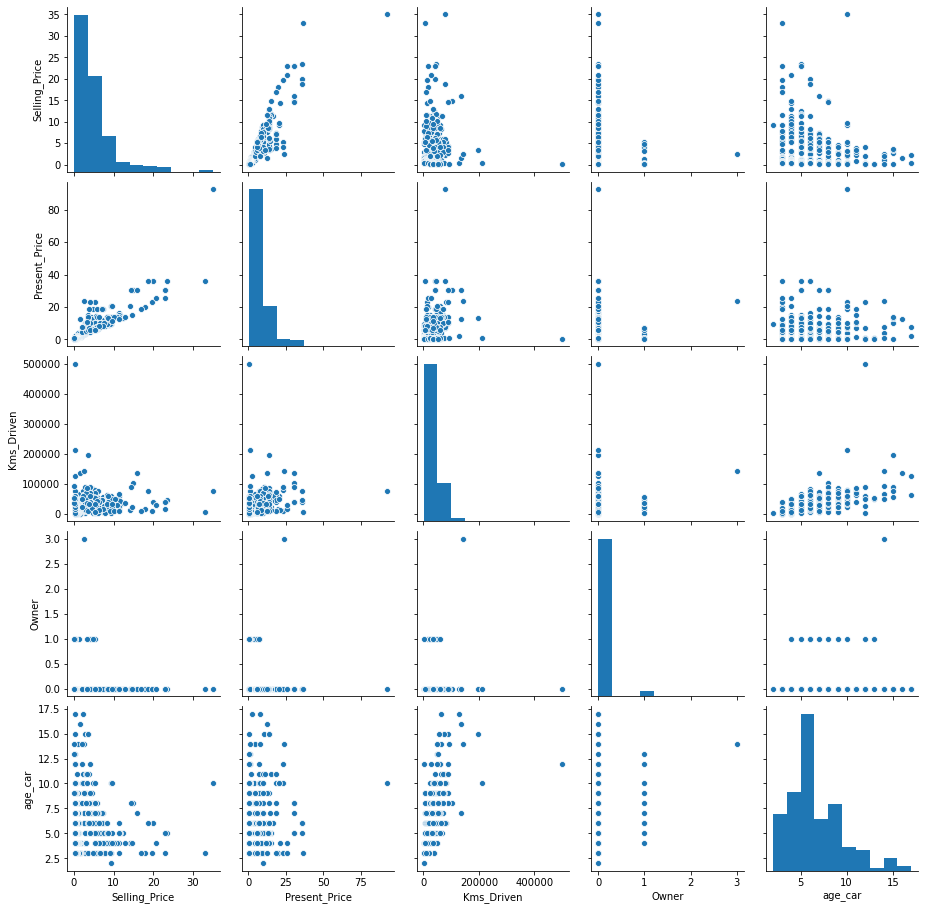

In [11]:
sns.pairplot(car)
plt.show()

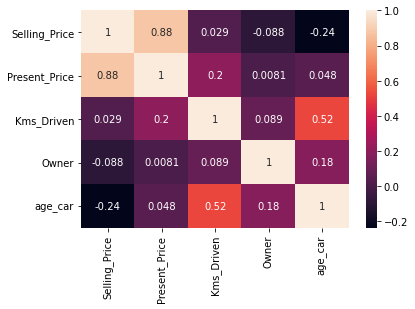

In [12]:
sns.heatmap(car.corr(), annot = True)
plt.show()

### From this we can observe that the selling_price and present_price are correlated with each other.
### car_age and kms_driven are correlated with each other.

### ***we will now visualize features wirth target***

In [13]:
car.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'age_car'],
      dtype='object')

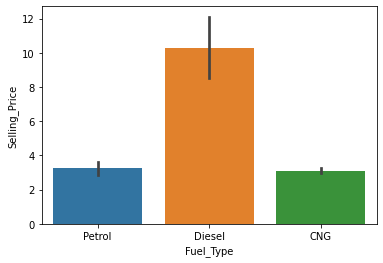

In [14]:
sns.barplot('Fuel_Type', 'Selling_Price' , data = car)
plt.show()

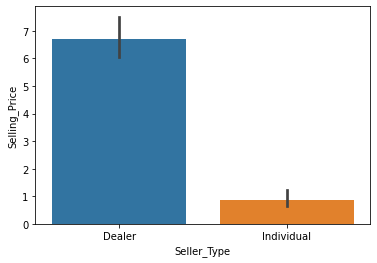

In [15]:
sns.barplot('Seller_Type', 'Selling_Price' , data = car)
plt.show()

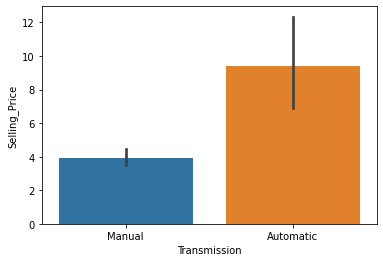

In [16]:
sns.barplot('Transmission', 'Selling_Price' , data = car)
plt.show()

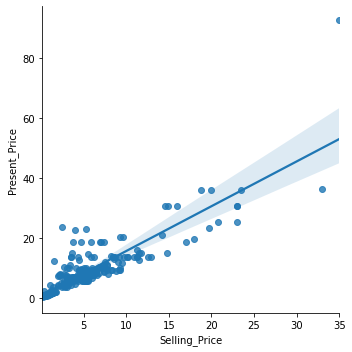

In [17]:
sns.lmplot('Selling_Price', 'Present_Price', data = car)
plt.show()

### ***From this we can observe that Selling_price increase as Present_Price increase***

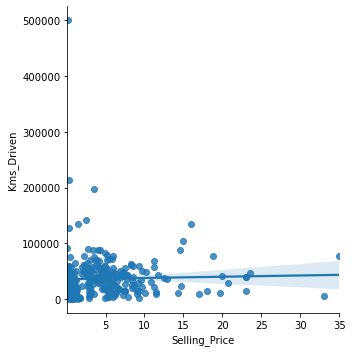

In [18]:
sns.lmplot('Selling_Price', 'Kms_Driven', data = car)
plt.show()

### *Lesser the kms_driven more the selling_price*

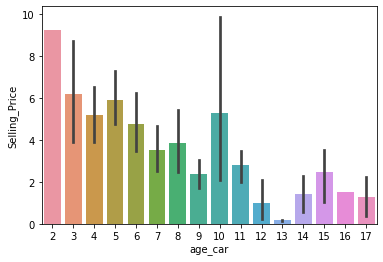

In [19]:
sns.barplot('age_car', 'Selling_Price', data = car)
plt.show()

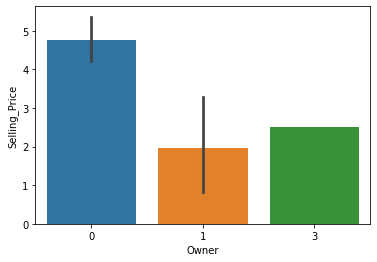

In [20]:
sns.barplot('Owner','Selling_Price', data = car)
plt.show()


In [21]:
car.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
car.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
car.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
car[["Fuel_Type","Seller_Type","Transmission"]]=car[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [22]:
car.drop('Car_Name',axis = 1, inplace = True)

In [23]:
car.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_car
0,3.35,5.59,27000,0,0,0,0,6
1,4.75,9.54,43000,1,0,0,0,7
2,7.25,9.85,6900,0,0,0,0,3
3,2.85,4.15,5200,0,0,0,0,9
4,4.60,6.87,42450,1,0,0,0,6


In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
 7   age_car        301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


### Split the data using train test split

In [25]:
from sklearn.model_selection import train_test_split
X = car.drop('Selling_Price', axis = 1)
y = car['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [26]:
X_train.shape, X_test.shape

((210, 7), (91, 7))

In [27]:
y_train.shape, y_test.shape

((210,), (91,))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()
model1 = lr.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
pred1 = pd.DataFrame(y_pred1)

In [29]:
r2_score(y_test, y_pred1)

0.8773175030338547

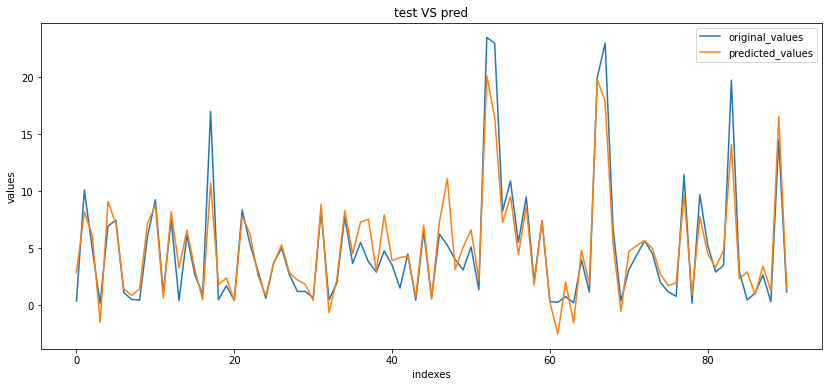

In [30]:
# plot original vs predicted values
plt.figure(figsize = (14, 6))
index=y_test.reset_index()["Selling_Price"]
ax=index.plot(label="original_values")
ax=pred1[0].plot(label = "predicted_values")
plt.legend(loc='upper right')
plt.title("test VS pred")
plt.xlabel("indexes")
plt.ylabel("values")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model2 = rfr.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
pred2 = pd.DataFrame(y_pred2)

In [32]:
r2_score(y_test, y_pred2)

0.9563137664218755

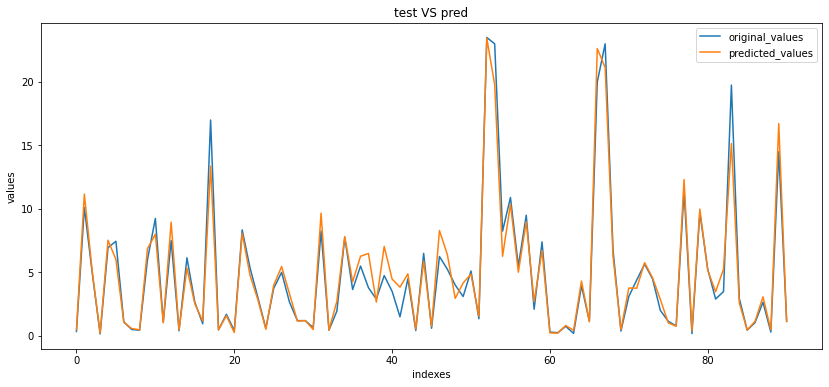

In [33]:
# plot original vs predicted values
plt.figure(figsize = (14, 6))
index=y_test.reset_index()["Selling_Price"]
ax=index.plot(label="original_values")
ax=pred2[0].plot(label = "predicted_values")
plt.legend(loc='upper right')
plt.title("test VS pred")
plt.xlabel("indexes")
plt.ylabel("values")
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
model3 = dtr.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
pred3 = pd.DataFrame(y_pred3)

In [35]:
r2_score(y_test, y_pred3)

0.9541870996294639

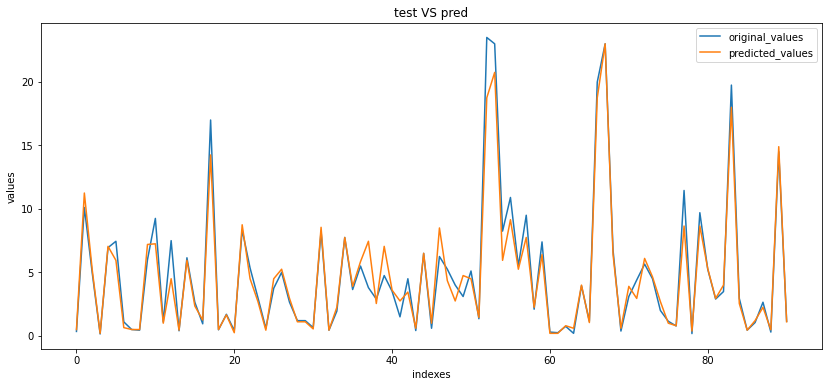

In [36]:
# plot original vs predicted values
plt.figure(figsize = (14, 6))
index=y_test.reset_index()["Selling_Price"]
ax=index.plot(label="original_values")
ax=pred3[0].plot(label = "predicted_values")
plt.legend(loc='upper right')
plt.title("test VS pred")
plt.xlabel("indexes")
plt.ylabel("values")
plt.show()

***From the above models and graph we can observe that the random forest regressor gives better predictions when compared with linear and decision tree regressors***